# Day 52: Pooling Layers and CNN Architectures

Welcome to Day 52! Today we'll explore pooling layers, a fundamental component of Convolutional Neural Networks (CNNs), and examine various CNN architectures that have revolutionized computer vision.

## Introduction

In the previous lesson, we learned about convolutional layers and how they extract features from images. However, convolutional layers alone can create very large feature maps that are computationally expensive and prone to overfitting. This is where **pooling layers** come in.

Pooling layers reduce the spatial dimensions of feature maps while retaining the most important information. Think of pooling as a way to "downsample" an image while preserving its key features. This reduction serves several critical purposes: it decreases computational requirements, reduces the number of parameters (helping prevent overfitting), and provides a form of translation invariance—meaning the network can recognize features regardless of their exact position in the image.

### Why Pooling Matters in Deep Learning

Pooling operations are essential for building deep CNNs because they:
- **Reduce computational complexity**: By shrinking feature map dimensions, we can stack more layers without overwhelming memory and processing power
- **Control overfitting**: Fewer parameters mean less chance of memorizing training data
- **Provide spatial invariance**: Objects can be recognized even if they're shifted slightly in the image
- **Create hierarchical representations**: As we pool and convolve, the network builds increasingly abstract feature representations

### Learning Objectives

By the end of this lesson, you will be able to:
- Understand the mathematical principles behind max pooling and average pooling
- Implement pooling layers using TensorFlow/Keras
- Recognize and understand classic CNN architectures (LeNet, AlexNet, VGG)
- Build a complete CNN with convolutional and pooling layers
- Analyze how pooling affects feature map dimensions and network performance

## Theory: Pooling Operations

### What is Pooling?

Pooling (also called subsampling or downsampling) is an operation that reduces the spatial dimensions of a feature map by combining nearby values into a single representative value. Unlike convolutional layers that learn their filters, pooling uses a fixed operation like taking the maximum or average.

### Max Pooling

Max pooling takes the maximum value within a defined window (typically 2×2) as it slides across the feature map. Mathematically, for a pooling window of size $k \times k$ at position $(i, j)$ in the input feature map $X$:

$$y_{i,j} = \max_{p=0}^{k-1} \max_{q=0}^{k-1} x_{i \cdot s + p, j \cdot s + q}$$

where:
- $y_{i,j}$ is the output value at position $(i, j)$
- $s$ is the stride (typically 2 for 2×2 pooling)
- $k$ is the pooling window size
- $x_{i \cdot s + p, j \cdot s + q}$ are the input values in the pooling window

**Why max pooling?** It preserves the strongest activations, which typically correspond to the most prominent features detected by the convolutional filters.

### Average Pooling

Average pooling computes the mean of all values in the pooling window:

$$y_{i,j} = \frac{1}{k^2} \sum_{p=0}^{k-1} \sum_{q=0}^{k-1} x_{i \cdot s + p, j \cdot s + q}$$

Average pooling provides a smoother downsampling but may dilute strong feature activations. It's often used in the final layers of a network (Global Average Pooling) to reduce feature maps to single values.

### Output Dimensions

Given an input feature map of size $H \times W$ and a pooling window of size $k \times k$ with stride $s$, the output dimensions are:

$$H_{out} = \left\lfloor \frac{H - k}{s} \right\rfloor + 1$$

$$W_{out} = \left\lfloor \frac{W - k}{s} \right\rfloor + 1$$

For the common case of 2×2 pooling with stride 2, the output dimensions are exactly half the input dimensions.

### Global Pooling

Global pooling (Global Max Pooling or Global Average Pooling) reduces each feature map to a single value by pooling over the entire spatial dimensions:

$$y_c = \max_{i,j} x_{i,j,c} \quad \text{(Global Max Pooling)}$$

$$y_c = \frac{1}{H \times W} \sum_{i=1}^{H} \sum_{j=1}^{W} x_{i,j,c} \quad \text{(Global Average Pooling)}$$

where $c$ indexes the channel (filter) dimension.

## Python Implementation

Let's implement and visualize pooling operations to understand how they work in practice.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.12.0


### Visualizing Max Pooling vs Average Pooling

Let's create a simple example to see the difference between max pooling and average pooling.

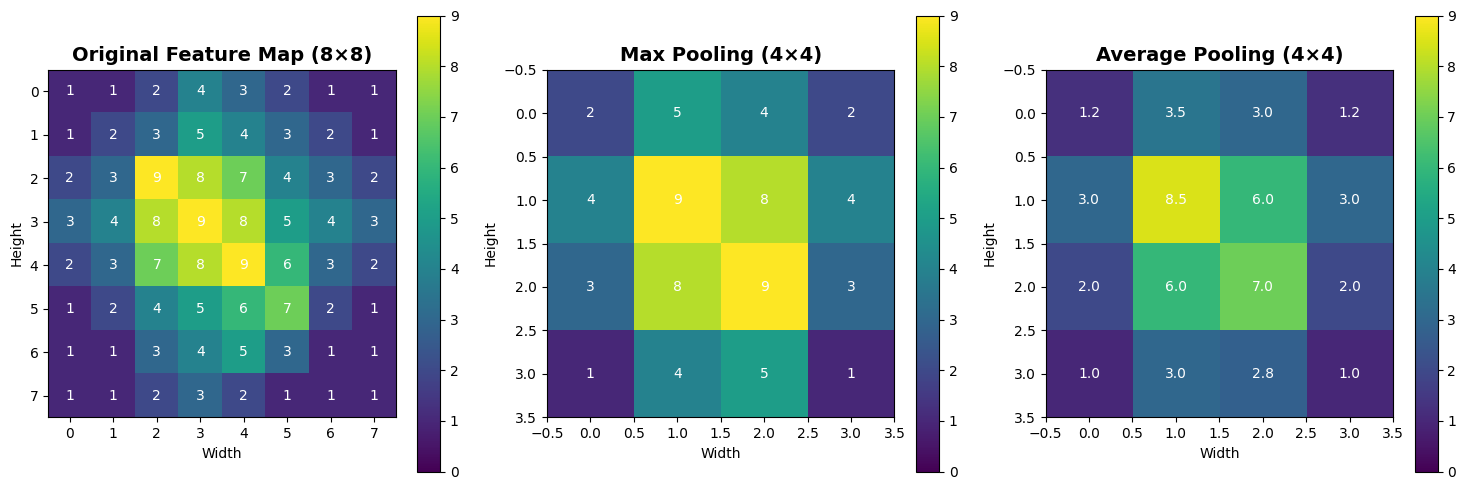


Observations:
Original shape: (8, 8)
After pooling shape: (4, 4)
Dimension reduction: 2.0x

Max pooling preserves the strongest activations (highest values).
Average pooling smooths the values by taking means.


In [2]:
# Create a simple 8x8 feature map with varying values
feature_map = np.array([
    [1, 1, 2, 4, 3, 2, 1, 1],
    [1, 2, 3, 5, 4, 3, 2, 1],
    [2, 3, 9, 8, 7, 4, 3, 2],
    [3, 4, 8, 9, 8, 5, 4, 3],
    [2, 3, 7, 8, 9, 6, 3, 2],
    [1, 2, 4, 5, 6, 7, 2, 1],
    [1, 1, 3, 4, 5, 3, 1, 1],
    [1, 1, 2, 3, 2, 1, 1, 1]
], dtype=np.float32)

# Reshape for TensorFlow (batch, height, width, channels)
feature_map_tf = feature_map.reshape(1, 8, 8, 1)

# Apply max pooling
max_pool = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
max_pooled = max_pool(feature_map_tf).numpy().reshape(4, 4)

# Apply average pooling
avg_pool = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
avg_pooled = avg_pool(feature_map_tf).numpy().reshape(4, 4)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original feature map
im0 = axes[0].imshow(feature_map, cmap='viridis', vmin=0, vmax=9)
axes[0].set_title('Original Feature Map (8×8)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Height')
for i in range(8):
    for j in range(8):
        axes[0].text(j, i, f'{feature_map[i, j]:.0f}', 
                    ha='center', va='center', color='white', fontsize=10)
plt.colorbar(im0, ax=axes[0])

# Max pooled
im1 = axes[1].imshow(max_pooled, cmap='viridis', vmin=0, vmax=9)
axes[1].set_title('Max Pooling (4×4)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Height')
for i in range(4):
    for j in range(4):
        axes[1].text(j, i, f'{max_pooled[i, j]:.0f}', 
                    ha='center', va='center', color='white', fontsize=10)
plt.colorbar(im1, ax=axes[1])

# Average pooled
im2 = axes[2].imshow(avg_pooled, cmap='viridis', vmin=0, vmax=9)
axes[2].set_title('Average Pooling (4×4)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Width')
axes[2].set_ylabel('Height')
for i in range(4):
    for j in range(4):
        axes[2].text(j, i, f'{avg_pooled[i, j]:.1f}', 
                    ha='center', va='center', color='white', fontsize=10)
plt.colorbar(im2, ax=axes[2])

plt.tight_layout()
plt.show()

print("\nObservations:")
print(f"Original shape: {feature_map.shape}")
print(f"After pooling shape: {max_pooled.shape}")
print(f"Dimension reduction: {feature_map.shape[0] / max_pooled.shape[0]}x")
print(f"\nMax pooling preserves the strongest activations (highest values).")
print(f"Average pooling smooths the values by taking means.")

## Classic CNN Architectures

Over the years, researchers have developed various CNN architectures that have achieved remarkable success in computer vision tasks. Let's explore some foundational architectures:

### 1. LeNet-5 (1998)

Developed by Yann LeCun for handwritten digit recognition, LeNet-5 was one of the first successful CNNs. Its architecture:

- **Input**: 32×32 grayscale images
- **Conv1**: 6 filters of 5×5 → 28×28×6
- **Pool1**: Max pooling 2×2 → 14×14×6
- **Conv2**: 16 filters of 5×5 → 10×10×16
- **Pool2**: Max pooling 2×2 → 5×5×16
- **Flatten**: 400 neurons
- **FC1**: 120 neurons
- **FC2**: 84 neurons
- **Output**: 10 classes

### 2. AlexNet (2012)

AlexNet won the ImageNet competition by a large margin and reignited interest in deep learning:

- Much deeper than LeNet with 8 layers (5 convolutional, 3 fully connected)
- Used ReLU activation instead of tanh/sigmoid
- Employed dropout for regularization
- Used data augmentation

### 3. VGG-16 (2014)

VGG networks demonstrated that depth matters by using many small 3×3 filters:

- 16-19 weight layers
- Only 3×3 convolutions and 2×2 max pooling throughout
- Simple and uniform architecture
- Very deep for its time

### Key Architectural Patterns

Most successful CNNs follow these patterns:
1. **Convolutional blocks**: Conv → Activation → Pool
2. **Increasing depth**: Number of filters increases as spatial dimensions decrease
3. **Final classification**: Flatten → Dense layers → Output
4. **Regularization**: Dropout, batch normalization

## Building a Complete CNN with Pooling Layers

Let's build a CNN for MNIST digit classification that demonstrates the concepts we've learned.

       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

 4595712/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 9166848/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


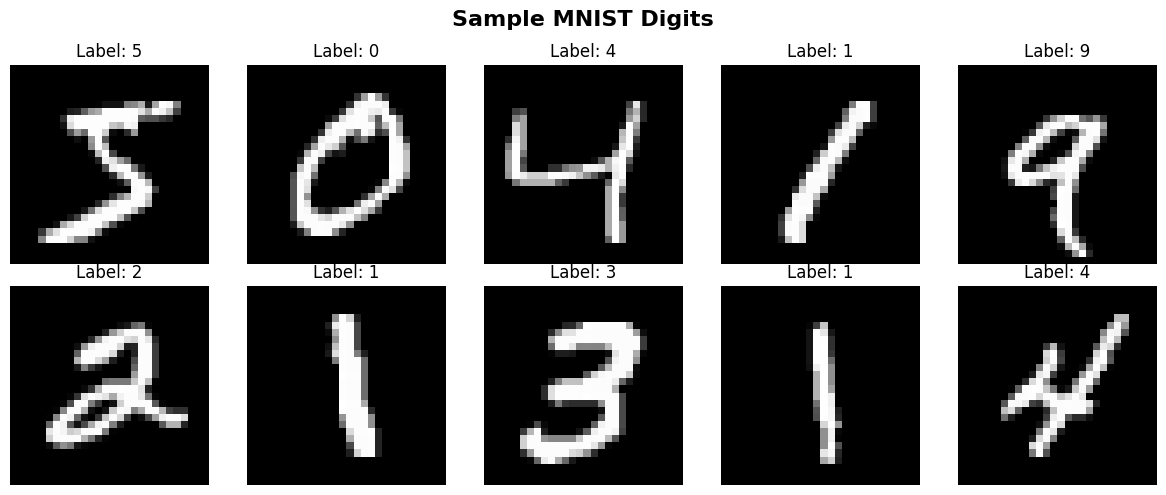

In [3]:
# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train_cat.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test_cat.shape}")

# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [4]:
# Build a CNN inspired by LeNet architecture
def create_cnn_model():
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), 
                     padding='same', name='conv1'),
        layers.MaxPooling2D((2, 2), name='pool1'),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        layers.MaxPooling2D((2, 2), name='pool2'),
        
        # Third convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3'),
        
        # Flatten and dense layers
        layers.Flatten(name='flatten'),
        layers.Dense(64, activation='relu', name='dense1'),
        layers.Dropout(0.5, name='dropout'),
        layers.Dense(10, activation='softmax', name='output')
    ])
    
    return model

# Create and compile the model
model = create_cnn_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

### Understanding the Architecture

Let's analyze how the dimensions change through our network:

1. **Input**: 28×28×1 (height × width × channels)
2. **Conv1** (32 filters, 3×3, padding='same'): 28×28×32
3. **Pool1** (2×2): 14×14×32 (dimensions halved)
4. **Conv2** (64 filters, 3×3, padding='same'): 14×14×64
5. **Pool2** (2×2): 7×7×64 (dimensions halved again)
6. **Conv3** (64 filters, 3×3, padding='same'): 7×7×64
7. **Flatten**: 3,136 (7×7×64 = 3,136)
8. **Dense1**: 64 neurons
9. **Output**: 10 neurons (one per digit class)

Notice how pooling reduces spatial dimensions while we increase the number of filters (channels).

In [5]:
# Train the model
print("Training the CNN...\n")

history = model.fit(
    X_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

print("\nTraining complete!")

Training the CNN...



Epoch 1/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 20:36 3s/step - accuracy: 0.1406 - loss: 2.3118

  4/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1654 - loss: 2.2948 

  7/422 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1894 - loss: 2.2789

 11/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2161 - loss: 2.2513

 14/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2352 - loss: 2.2227

 17/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2521 - loss: 2.1899

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2720 - loss: 2.1435

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2903 - loss: 2.0969

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3076 - loss: 2.0496

 32/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3200 - loss: 2.0143

 35/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3322 - loss: 1.9794

 38/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3442 - loss: 1.9451

 41/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3558 - loss: 1.9119

 44/422 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3668 - loss: 1.8802

 47/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3773 - loss: 1.8496

 50/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3876 - loss: 1.8200

 53/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3974 - loss: 1.7916

 56/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4068 - loss: 1.7643

 59/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4158 - loss: 1.7381

 62/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4245 - loss: 1.7129

 65/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4328 - loss: 1.6886

 68/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4409 - loss: 1.6652

 71/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4486 - loss: 1.6426

 74/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4562 - loss: 1.6207

 77/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4634 - loss: 1.5997

 81/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4727 - loss: 1.5730

 84/422 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4793 - loss: 1.5537

 87/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4858 - loss: 1.5351

 91/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4940 - loss: 1.5112

 95/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5019 - loss: 1.4884

 98/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5076 - loss: 1.4718

101/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5132 - loss: 1.4558

104/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5185 - loss: 1.4402

107/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5238 - loss: 1.4252

110/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5288 - loss: 1.4105

113/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5338 - loss: 1.3963

116/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5386 - loss: 1.3825

120/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5448 - loss: 1.3647

123/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5493 - loss: 1.3518

126/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5536 - loss: 1.3392

129/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5579 - loss: 1.3270

132/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5620 - loss: 1.3151

135/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5660 - loss: 1.3035

138/422 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5700 - loss: 1.2922

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5738 - loss: 1.2812

144/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5775 - loss: 1.2705

147/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5812 - loss: 1.2600

150/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5847 - loss: 1.2498

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5882 - loss: 1.2398

156/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5916 - loss: 1.2300

159/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5949 - loss: 1.2205

162/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5981 - loss: 1.2111

165/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6013 - loss: 1.2020

168/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6044 - loss: 1.1930

171/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6075 - loss: 1.1842

174/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6104 - loss: 1.1757

177/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6134 - loss: 1.1672

180/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6162 - loss: 1.1590

183/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6190 - loss: 1.1509

186/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6218 - loss: 1.1430

189/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6244 - loss: 1.1352

192/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6271 - loss: 1.1276

195/422 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6297 - loss: 1.1202

198/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6322 - loss: 1.1129

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6347 - loss: 1.1057

204/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6371 - loss: 1.0986

207/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6395 - loss: 1.0917

210/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6419 - loss: 1.0848

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6442 - loss: 1.0781

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6465 - loss: 1.0715

219/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6487 - loss: 1.0651

222/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6509 - loss: 1.0587

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6531 - loss: 1.0524

228/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6552 - loss: 1.0463

231/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6573 - loss: 1.0403

234/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6593 - loss: 1.0343

237/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6613 - loss: 1.0285

240/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6633 - loss: 1.0227

243/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6653 - loss: 1.0171

246/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6672 - loss: 1.0115

249/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6691 - loss: 1.0060

252/422 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6710 - loss: 1.0006

255/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6728 - loss: 0.9953

259/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6752 - loss: 0.9883

262/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6770 - loss: 0.9831

266/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6794 - loss: 0.9764

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6811 - loss: 0.9714

272/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6828 - loss: 0.9665

275/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6844 - loss: 0.9616

278/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6861 - loss: 0.9569

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6877 - loss: 0.9522

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6898 - loss: 0.9460

288/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6914 - loss: 0.9414

291/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6929 - loss: 0.9369

294/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6944 - loss: 0.9325

297/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6959 - loss: 0.9281

300/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6974 - loss: 0.9238

303/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6989 - loss: 0.9196

306/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7003 - loss: 0.9154

309/422 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7017 - loss: 0.9112

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7031 - loss: 0.9071

315/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7045 - loss: 0.9031

319/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7063 - loss: 0.8977

322/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7077 - loss: 0.8938

326/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7095 - loss: 0.8886

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7108 - loss: 0.8848

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7125 - loss: 0.8798

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7142 - loss: 0.8748

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7158 - loss: 0.8700

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7175 - loss: 0.8652

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7191 - loss: 0.8605

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7207 - loss: 0.8558

357/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7222 - loss: 0.8513

361/422 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7237 - loss: 0.8468

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7253 - loss: 0.8423

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7267 - loss: 0.8380

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7282 - loss: 0.8337

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7296 - loss: 0.8294

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7311 - loss: 0.8253

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7325 - loss: 0.8212

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7338 - loss: 0.8171

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7352 - loss: 0.8131

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7365 - loss: 0.8092

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7379 - loss: 0.8053

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7392 - loss: 0.8015

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7405 - loss: 0.7977

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7417 - loss: 0.7940

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7430 - loss: 0.7903

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7442 - loss: 0.7867

422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8732 - loss: 0.4071 - val_accuracy: 0.9807 - val_loss: 0.0601


Epoch 2/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.9062 - loss: 0.1941

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9326 - loss: 0.1681 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9404 - loss: 0.1614

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9441 - loss: 0.1598

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9470 - loss: 0.1561

 21/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9489 - loss: 0.1532

 25/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9500 - loss: 0.1525

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9506 - loss: 0.1529

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9511 - loss: 0.1529

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9515 - loss: 0.1527

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9518 - loss: 0.1524

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9522 - loss: 0.1520

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9525 - loss: 0.1518

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9527 - loss: 0.1520

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9528 - loss: 0.1521

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9530 - loss: 0.1522

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9531 - loss: 0.1524

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9531 - loss: 0.1526

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9532 - loss: 0.1527

 77/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9533 - loss: 0.1528

 81/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9533 - loss: 0.1529

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9533 - loss: 0.1529

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9534 - loss: 0.1529

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9535 - loss: 0.1529

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9535 - loss: 0.1530

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9535 - loss: 0.1530

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1530

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1530

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1531

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1531

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1531

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9536 - loss: 0.1531

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9537 - loss: 0.1531

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9537 - loss: 0.1531

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9537 - loss: 0.1531

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9537 - loss: 0.1531

145/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9537 - loss: 0.1531

149/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9537 - loss: 0.1531

153/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9537 - loss: 0.1531

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9537 - loss: 0.1531

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9537 - loss: 0.1531

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9538 - loss: 0.1530

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9538 - loss: 0.1530

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9538 - loss: 0.1529

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9538 - loss: 0.1528

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9539 - loss: 0.1527

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9539 - loss: 0.1527

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9540 - loss: 0.1526

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9540 - loss: 0.1525

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9540 - loss: 0.1524

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9541 - loss: 0.1523

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9541 - loss: 0.1522

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9542 - loss: 0.1520

213/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9543 - loss: 0.1519

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9543 - loss: 0.1518

221/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9544 - loss: 0.1517

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9544 - loss: 0.1515

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9545 - loss: 0.1514

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9545 - loss: 0.1513

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9546 - loss: 0.1512

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9546 - loss: 0.1511

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9547 - loss: 0.1510

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9548 - loss: 0.1509

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9548 - loss: 0.1508

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9549 - loss: 0.1506

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9549 - loss: 0.1505

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9550 - loss: 0.1504

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9551 - loss: 0.1502

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9551 - loss: 0.1501

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9552 - loss: 0.1499

281/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9553 - loss: 0.1498

285/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9553 - loss: 0.1496

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9554 - loss: 0.1494

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9555 - loss: 0.1493

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9555 - loss: 0.1491

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9556 - loss: 0.1490

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9557 - loss: 0.1488

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9557 - loss: 0.1487

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9558 - loss: 0.1485

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9558 - loss: 0.1483

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9559 - loss: 0.1482

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9560 - loss: 0.1480

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9560 - loss: 0.1478

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9561 - loss: 0.1477

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9562 - loss: 0.1475

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9562 - loss: 0.1474

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9563 - loss: 0.1472

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9563 - loss: 0.1471

353/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9564 - loss: 0.1469

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9565 - loss: 0.1468

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9565 - loss: 0.1466

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9566 - loss: 0.1465

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9566 - loss: 0.1463

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9567 - loss: 0.1462

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9567 - loss: 0.1460

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9568 - loss: 0.1459

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9568 - loss: 0.1458

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9569 - loss: 0.1456

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9569 - loss: 0.1455

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9570 - loss: 0.1454

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9570 - loss: 0.1453

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9571 - loss: 0.1451

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9571 - loss: 0.1450

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9572 - loss: 0.1449

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9572 - loss: 0.1448

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9573 - loss: 0.1446

422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9622 - loss: 0.1317 - val_accuracy: 0.9895 - val_loss: 0.0383


Epoch 3/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9609 - loss: 0.1249

  5/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9656 - loss: 0.1013 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9677 - loss: 0.0940

 13/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9680 - loss: 0.0942

 17/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9685 - loss: 0.0945

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9689 - loss: 0.0953

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9688 - loss: 0.0973

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9688 - loss: 0.0994

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9689 - loss: 0.1005

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9690 - loss: 0.1010

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9692 - loss: 0.1013

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9694 - loss: 0.1012

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9696 - loss: 0.1012

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9698 - loss: 0.1013

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9700 - loss: 0.1014

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9701 - loss: 0.1014

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9702 - loss: 0.1015

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9703 - loss: 0.1017

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9703 - loss: 0.1017

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9704 - loss: 0.1018

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9704 - loss: 0.1017

 85/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9704 - loss: 0.1017

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9705 - loss: 0.1016

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9705 - loss: 0.1016

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9705 - loss: 0.1016

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9705 - loss: 0.1015

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9706 - loss: 0.1015

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9706 - loss: 0.1014

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9706 - loss: 0.1014

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9707 - loss: 0.1013

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9707 - loss: 0.1013

124/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9707 - loss: 0.1012

128/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9708 - loss: 0.1012

132/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9708 - loss: 0.1011

136/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9708 - loss: 0.1011

140/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9709 - loss: 0.1011

144/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9709 - loss: 0.1010

148/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9709 - loss: 0.1010

152/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9709 - loss: 0.1010

156/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9709 - loss: 0.1009

160/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1009

164/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1009

168/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1009

172/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

176/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

180/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

184/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

188/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

192/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

196/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1008

200/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1007

204/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1007

208/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1007

212/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1007

216/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9710 - loss: 0.1006

220/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9711 - loss: 0.1006

224/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1006

228/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1006

232/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1006

236/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

240/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

244/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

248/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

252/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

256/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1005

260/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1004

264/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1004

268/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1003

272/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1003

276/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1002

280/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1002

284/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9711 - loss: 0.1001

288/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9712 - loss: 0.1000

292/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9712 - loss: 0.1000

296/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9712 - loss: 0.0999

300/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9712 - loss: 0.0998

304/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9712 - loss: 0.0998

308/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9712 - loss: 0.0997

312/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9713 - loss: 0.0996

316/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9713 - loss: 0.0996

320/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9713 - loss: 0.0995

324/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9713 - loss: 0.0994

328/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9713 - loss: 0.0994

332/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0993

336/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0992

340/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0992

344/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0991

348/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0990

352/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9714 - loss: 0.0990

356/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0989

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0988

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0988

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0987

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0987

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0986

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0986

384/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0985

388/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0985

392/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0984

396/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0984

400/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0983

404/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9716 - loss: 0.0983

408/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9717 - loss: 0.0982

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9717 - loss: 0.0982

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9717 - loss: 0.0981

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9717 - loss: 0.0981

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9732 - loss: 0.0929 - val_accuracy: 0.9895 - val_loss: 0.0370


Epoch 4/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.9609 - loss: 0.1280

  5/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9771 - loss: 0.0828 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9787 - loss: 0.0720

 13/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9788 - loss: 0.0700

 17/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9784 - loss: 0.0696

 21/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9778 - loss: 0.0705

 25/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9771 - loss: 0.0717

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9767 - loss: 0.0731

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9765 - loss: 0.0739

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9764 - loss: 0.0745

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9763 - loss: 0.0750

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9764 - loss: 0.0751

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9764 - loss: 0.0755

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9765 - loss: 0.0759

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9765 - loss: 0.0762

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9765 - loss: 0.0766

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9765 - loss: 0.0769

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9766 - loss: 0.0772

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9766 - loss: 0.0774

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9767 - loss: 0.0775

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9767 - loss: 0.0776

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9768 - loss: 0.0776

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9768 - loss: 0.0777

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9768 - loss: 0.0778

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0779

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0781

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0783

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0784

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0786

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0787

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0787

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0788

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9769 - loss: 0.0789

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0789

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0790

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0790

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0791

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0792

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9770 - loss: 0.0792

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0793

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0793

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0793

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0794

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0794

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0794

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9770 - loss: 0.0795

221/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0795

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0794

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0793

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9770 - loss: 0.0793

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0792

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0792

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0792

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0791

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0790

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0790

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0789

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9771 - loss: 0.0789

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9771 - loss: 0.0788

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0787

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0787

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0786

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0785

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0785

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0784

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0783

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0783

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0782

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0782

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0781

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0780

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0780

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0779

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9774 - loss: 0.0779

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9774 - loss: 0.0778

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9774 - loss: 0.0778

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9774 - loss: 0.0777

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9774 - loss: 0.0777

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9774 - loss: 0.0776

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9774 - loss: 0.0776

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9774 - loss: 0.0775

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9774 - loss: 0.0775

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9774 - loss: 0.0775

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0774

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0774

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0773

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0773

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0773

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0772

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0772

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0772

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9775 - loss: 0.0771

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9781 - loss: 0.0740 - val_accuracy: 0.9922 - val_loss: 0.0327


Epoch 5/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9688 - loss: 0.1101

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9758 - loss: 0.0833 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9777 - loss: 0.0759

 13/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9781 - loss: 0.0729

 17/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9788 - loss: 0.0697

 21/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9792 - loss: 0.0673

 25/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9795 - loss: 0.0660

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9795 - loss: 0.0655

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9796 - loss: 0.0651

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9797 - loss: 0.0649

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9799 - loss: 0.0646

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9801 - loss: 0.0640

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9802 - loss: 0.0639

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9803 - loss: 0.0638

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9804 - loss: 0.0637

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9805 - loss: 0.0636

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9805 - loss: 0.0636

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9806 - loss: 0.0636

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9806 - loss: 0.0636

 77/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9807 - loss: 0.0636

 81/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9807 - loss: 0.0636

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9808 - loss: 0.0636

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9808 - loss: 0.0635

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9808 - loss: 0.0635

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9809 - loss: 0.0635

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9809 - loss: 0.0635

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9809 - loss: 0.0635

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9809 - loss: 0.0636

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9810 - loss: 0.0635

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9811 - loss: 0.0635

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9811 - loss: 0.0636

149/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

153/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0636

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0637

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0637

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0637

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0637

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0637

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0638

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0638

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9811 - loss: 0.0638

217/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

221/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0638

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9811 - loss: 0.0639

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9811 - loss: 0.0639

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9811 - loss: 0.0639

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9811 - loss: 0.0639

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9811 - loss: 0.0639

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9811 - loss: 0.0639

285/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9811 - loss: 0.0638

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9811 - loss: 0.0638

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9811 - loss: 0.0638

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9811 - loss: 0.0638

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0638

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0637

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0637

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0637

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0637

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0636

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0636

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0636

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0636

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0635

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0635

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0635

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0635

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9812 - loss: 0.0634

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9812 - loss: 0.0634

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9812 - loss: 0.0634

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9812 - loss: 0.0634

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0633

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0633

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0633

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0633

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0632

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0631

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0631

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9813 - loss: 0.0631

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9815 - loss: 0.0616 - val_accuracy: 0.9902 - val_loss: 0.0354


Epoch 6/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9766 - loss: 0.0915

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9827 - loss: 0.0627 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9839 - loss: 0.0572

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9837 - loss: 0.0553

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9837 - loss: 0.0544

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9839 - loss: 0.0542

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9839 - loss: 0.0550

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9839 - loss: 0.0563

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9839 - loss: 0.0570

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9838 - loss: 0.0576

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9837 - loss: 0.0579

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9836 - loss: 0.0580

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0584

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0585

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0586

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0586

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0586

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0586

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0585

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0585

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0584

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0583

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0582

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0581

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0580

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0580

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0580

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0579

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0579

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0579

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0579

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9835 - loss: 0.0580

149/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

153/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9835 - loss: 0.0580

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0581

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0581

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0581

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0582

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9834 - loss: 0.0582

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9833 - loss: 0.0582

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9833 - loss: 0.0582

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9833 - loss: 0.0582

221/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0582

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0583

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0583

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0583

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9833 - loss: 0.0583

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0583

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9832 - loss: 0.0582

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0582

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0582

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0582

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0581

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0581

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9832 - loss: 0.0581

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0581

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0581

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0580

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0580

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0580

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0579

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0579

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0579

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0579

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0578

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9833 - loss: 0.0578

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0578

360/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0578

364/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0577

368/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0577

372/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0577

376/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0577

380/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0576

383/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0576

387/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0576

391/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0576

395/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0576

399/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0575

403/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0575

407/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0575

411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0575

415/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0575

419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9833 - loss: 0.0574

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9837 - loss: 0.0556 - val_accuracy: 0.9905 - val_loss: 0.0318


Epoch 7/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9766 - loss: 0.1038

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9815 - loss: 0.0662 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9829 - loss: 0.0570

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9842 - loss: 0.0523

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9848 - loss: 0.0494

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9852 - loss: 0.0478

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9854 - loss: 0.0471

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9853 - loss: 0.0470

 33/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9852 - loss: 0.0470

 37/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9852 - loss: 0.0470

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9851 - loss: 0.0470

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9851 - loss: 0.0469

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9850 - loss: 0.0470

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9850 - loss: 0.0471

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9849 - loss: 0.0472

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9849 - loss: 0.0473

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0474

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0476

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0476

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0476

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0475

 85/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0476

 89/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0476

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0477

 97/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9848 - loss: 0.0479

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0481

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0482

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0484

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0485

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0486

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0487

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0488

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0489

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9847 - loss: 0.0489

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0490

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0490

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0491

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0491

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0491

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9846 - loss: 0.0492

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0492

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0492

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0492

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0493

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9846 - loss: 0.0494

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0494

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9846 - loss: 0.0493

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9847 - loss: 0.0493

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9847 - loss: 0.0493

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9847 - loss: 0.0492

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9847 - loss: 0.0492

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9847 - loss: 0.0492

289/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9847 - loss: 0.0491

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9847 - loss: 0.0491

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9847 - loss: 0.0491

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9847 - loss: 0.0491

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9847 - loss: 0.0490

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0490

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0490

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0490

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0490

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0489

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0489

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0489

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0489

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0489

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0488

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0488

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9848 - loss: 0.0488

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9848 - loss: 0.0488

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

412/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9849 - loss: 0.0487

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9853 - loss: 0.0481 - val_accuracy: 0.9907 - val_loss: 0.0347


Epoch 8/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9922 - loss: 0.0431

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9914 - loss: 0.0380 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9904 - loss: 0.0377

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9899 - loss: 0.0368

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9898 - loss: 0.0363

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9895 - loss: 0.0366

 24/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9891 - loss: 0.0374

 28/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9886 - loss: 0.0384

 32/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9882 - loss: 0.0389

 35/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9880 - loss: 0.0392

 38/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9879 - loss: 0.0395

 42/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9878 - loss: 0.0396

 45/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9878 - loss: 0.0397

 49/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9878 - loss: 0.0398

 53/422 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9878 - loss: 0.0399

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9878 - loss: 0.0400

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9878 - loss: 0.0401

 64/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9877 - loss: 0.0403

 68/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9877 - loss: 0.0405

 72/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9876 - loss: 0.0407

 76/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9876 - loss: 0.0409

 80/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9875 - loss: 0.0412

 83/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9874 - loss: 0.0413

 86/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9874 - loss: 0.0415

 90/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9873 - loss: 0.0417

 94/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9873 - loss: 0.0419

 98/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9872 - loss: 0.0421

101/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9872 - loss: 0.0422

105/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9871 - loss: 0.0423

108/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9871 - loss: 0.0424

111/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9870 - loss: 0.0425

114/422 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9870 - loss: 0.0426

118/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9870 - loss: 0.0427

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9869 - loss: 0.0428

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9869 - loss: 0.0428

128/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9869 - loss: 0.0429

131/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9869 - loss: 0.0429

134/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9869 - loss: 0.0430

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0430

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0431

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0431

148/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0431

151/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0431

155/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0432

159/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0432

162/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9868 - loss: 0.0432

166/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9867 - loss: 0.0433

170/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9867 - loss: 0.0433

174/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9867 - loss: 0.0433

178/422 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9867 - loss: 0.0434

182/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9867 - loss: 0.0435

186/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9866 - loss: 0.0435

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9866 - loss: 0.0436

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9866 - loss: 0.0436

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9866 - loss: 0.0437

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9866 - loss: 0.0437

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9865 - loss: 0.0437

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9865 - loss: 0.0438

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9865 - loss: 0.0438

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9865 - loss: 0.0438

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9865 - loss: 0.0438

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9864 - loss: 0.0439

229/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9864 - loss: 0.0439

233/422 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9864 - loss: 0.0439

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0439

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0438

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0438

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0438

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0438

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0437

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0437

289/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0437

293/422 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9864 - loss: 0.0437

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9864 - loss: 0.0436

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9864 - loss: 0.0436

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9864 - loss: 0.0436

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9864 - loss: 0.0435

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0435

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0435

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0435

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0434

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9865 - loss: 0.0434

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0434

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0434

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0434

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0434

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0433

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0433

357/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9865 - loss: 0.0433

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0433

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0433

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0433

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9865 - loss: 0.0432

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9927 - val_loss: 0.0285


Epoch 9/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.9766 - loss: 0.0800

  5/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9861 - loss: 0.0478 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9887 - loss: 0.0409

 13/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9899 - loss: 0.0372

 17/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9904 - loss: 0.0351

 21/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9907 - loss: 0.0341

 25/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0337

 29/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0338

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9907 - loss: 0.0343

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9905 - loss: 0.0348

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9903 - loss: 0.0353

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9901 - loss: 0.0356

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9899 - loss: 0.0360

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9898 - loss: 0.0364

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9896 - loss: 0.0367

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9895 - loss: 0.0371

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9893 - loss: 0.0374

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9892 - loss: 0.0378

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9891 - loss: 0.0381

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9890 - loss: 0.0383

 81/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9889 - loss: 0.0385

 85/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9888 - loss: 0.0387

 89/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9888 - loss: 0.0388

 93/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9887 - loss: 0.0390

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9886 - loss: 0.0392

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9886 - loss: 0.0393

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9885 - loss: 0.0394

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9885 - loss: 0.0395

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9884 - loss: 0.0396

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9884 - loss: 0.0397

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9883 - loss: 0.0398

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9883 - loss: 0.0399

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9883 - loss: 0.0399

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9882 - loss: 0.0399

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9882 - loss: 0.0400

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9882 - loss: 0.0400

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9882 - loss: 0.0400

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9881 - loss: 0.0401

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9881 - loss: 0.0401

157/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9881 - loss: 0.0401

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9881 - loss: 0.0401

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9880 - loss: 0.0402

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9880 - loss: 0.0402

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9880 - loss: 0.0402

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9880 - loss: 0.0402

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9880 - loss: 0.0403

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0403

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9879 - loss: 0.0404

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9878 - loss: 0.0404

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9878 - loss: 0.0404

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9878 - loss: 0.0404

225/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9878 - loss: 0.0404

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

268/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

271/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

275/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

279/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

283/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

287/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0404

291/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9877 - loss: 0.0403

294/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9877 - loss: 0.0403

298/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0403

302/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0403

306/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0403

310/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0402

314/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0402

318/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0402

322/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0401

326/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0401

330/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0401

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0400

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0400

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0400

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0400

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0399

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9878 - loss: 0.0399

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9878 - loss: 0.0399

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9878 - loss: 0.0398

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0398

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0398

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0397

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0396

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9928 - val_loss: 0.0311


Epoch 10/10


  1/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9922 - loss: 0.0434

  5/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9926 - loss: 0.0307 

  9/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9918 - loss: 0.0305

 13/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9915 - loss: 0.0306

 17/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9913 - loss: 0.0305

 21/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9911 - loss: 0.0303

 25/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9911 - loss: 0.0304

 29/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9910 - loss: 0.0306

 33/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9909 - loss: 0.0308

 37/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9908 - loss: 0.0312

 41/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9907 - loss: 0.0315

 45/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9906 - loss: 0.0317

 49/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9905 - loss: 0.0321

 53/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9905 - loss: 0.0324

 57/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9904 - loss: 0.0327

 61/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9903 - loss: 0.0330

 65/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9903 - loss: 0.0333

 69/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9902 - loss: 0.0336

 73/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9902 - loss: 0.0339

 77/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9901 - loss: 0.0342

 81/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9901 - loss: 0.0343

 85/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9900 - loss: 0.0345

 89/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9900 - loss: 0.0346

 93/422 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9899 - loss: 0.0348

 97/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9899 - loss: 0.0350

101/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9898 - loss: 0.0351

105/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9898 - loss: 0.0352

109/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9898 - loss: 0.0353

113/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9897 - loss: 0.0354

117/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9897 - loss: 0.0354

121/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9897 - loss: 0.0355

125/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9896 - loss: 0.0356

129/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9896 - loss: 0.0357

133/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9896 - loss: 0.0358

137/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9896 - loss: 0.0359

141/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9895 - loss: 0.0359

145/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9895 - loss: 0.0360

149/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9895 - loss: 0.0361

153/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9894 - loss: 0.0361

157/422 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9894 - loss: 0.0361

161/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9894 - loss: 0.0362

165/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9894 - loss: 0.0362

169/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9894 - loss: 0.0362

173/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

177/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

181/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

185/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

189/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

193/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

197/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

201/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

205/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9893 - loss: 0.0362

209/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0362

213/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0361

217/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0361

221/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0361

225/422 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0361

229/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0361

233/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0360

237/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0360

241/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0360

245/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0360

249/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0359

253/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0359

257/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0359

261/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0358

265/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0358

269/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0358

273/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0357

277/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0357

281/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0357

285/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0357

289/422 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9892 - loss: 0.0356

293/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0356

297/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0356

301/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0355

305/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0355

309/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0355

313/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0355

317/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0354

321/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0354

325/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0354

329/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0354

333/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0353

337/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0353

341/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0353

345/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0353

349/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0353

353/422 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9892 - loss: 0.0352

357/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

361/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

365/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

369/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

373/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

377/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0352

381/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

385/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

389/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

393/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

397/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

401/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

405/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

409/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

417/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0351

421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9891 - loss: 0.0351

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9889 - loss: 0.0343 - val_accuracy: 0.9915 - val_loss: 0.0321



Training complete!



Test Results:
Test Loss: 0.0280
Test Accuracy: 0.9917 (99.17%)


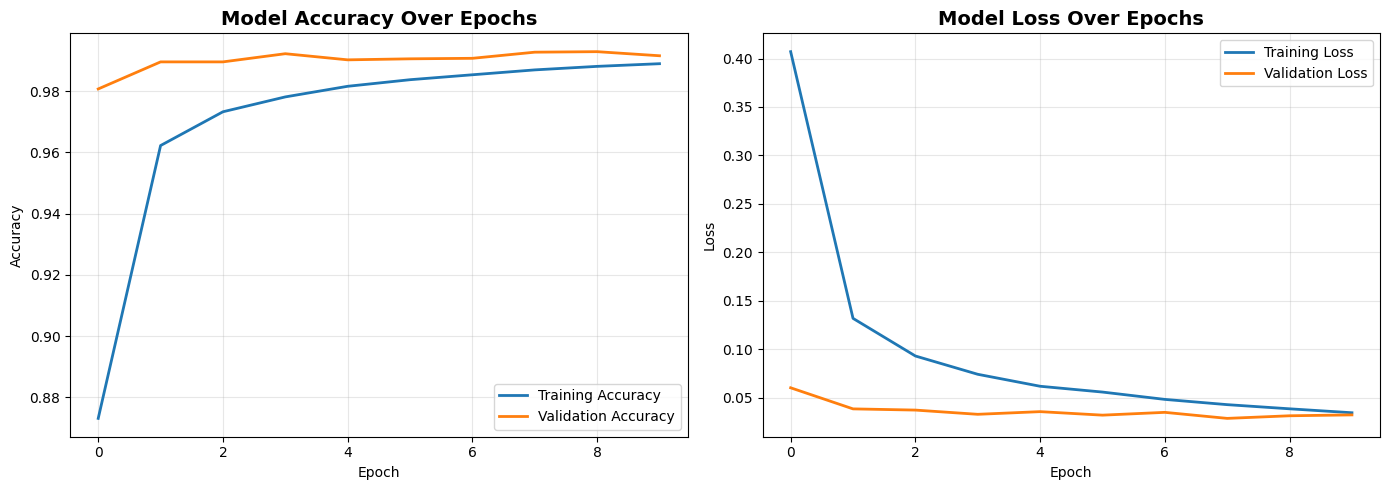

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Visualizing Feature Maps and Pooling Effects

Let's visualize how pooling affects the feature maps in our trained CNN.

In [7]:
# Create a model to extract intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers[:6]]  # First 6 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations for a sample image
sample_image = X_test[0:1]  # Keep batch dimension
activations = activation_model.predict(sample_image, verbose=0)

# Layer names for plotting
layer_names = ['conv1', 'pool1', 'conv2', 'pool2', 'conv3', 'flatten']

# Visualize the original image
plt.figure(figsize=(3, 3))
plt.imshow(sample_image[0].reshape(28, 28), cmap='gray')
plt.title(f'Original Image (Label: {y_test[0]})', fontweight='bold')
plt.axis('off')
plt.show()

# Visualize feature maps from convolutional and pooling layers
for layer_name, activation in zip(layer_names[:5], activations[:5]):
    if len(activation.shape) == 4:  # Conv and pooling layers
        n_features = activation.shape[-1]
        size = activation.shape[1]
        
        # Display first 8 feature maps
        n_cols = 8
        n_rows = 1
        display_grid = np.zeros((size * n_rows, size * n_cols))
        
        for row in range(n_rows):
            for col in range(n_cols):
                if col < n_features:
                    channel_image = activation[0, :, :, col]
                    # Normalize for better visualization
                    channel_image -= channel_image.mean()
                    if channel_image.std() > 0:
                        channel_image /= channel_image.std()
                    channel_image = np.clip(channel_image, 0, 1)
                    display_grid[row * size:(row + 1) * size,
                               col * size:(col + 1) * size] = channel_image
        
        plt.figure(figsize=(12, 2))
        plt.title(f'{layer_name} - Shape: {activation.shape[1:]}', 
                 fontsize=12, fontweight='bold')
        plt.imshow(display_grid, cmap='viridis')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

print("\nObservations:")
print("- After each pooling layer, the spatial dimensions are halved")
print("- Pooling preserves the most important features while reducing size")
print("- Deeper layers show more abstract, high-level features")

AttributeError: The layer sequential has never been called and thus has no defined input.

## Comparing Different Pooling Strategies

Let's compare the performance of CNNs with different pooling strategies.

In [ ]:
# Function to create models with different pooling types
def create_cnn_with_pooling(pooling_type='max'):
    """Create a CNN with specified pooling type."""
    if pooling_type == 'max':
        pool_layer = layers.MaxPooling2D
    elif pooling_type == 'avg':
        pool_layer = layers.AveragePooling2D
    else:
        raise ValueError("pooling_type must be 'max' or 'avg'")
    
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        pool_layer((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        pool_layer((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train models with different pooling (using smaller subset for speed)
X_train_small = X_train[:10000]
y_train_small = y_train_cat[:10000]

print("Training CNN with Max Pooling...")
model_max = create_cnn_with_pooling('max')
history_max = model_max.fit(
    X_train_small, y_train_small,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=0
)

print("Training CNN with Average Pooling...")
model_avg = create_cnn_with_pooling('avg')
history_avg = model_avg.fit(
    X_train_small, y_train_small,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=0
)

# Evaluate both models
_, acc_max = model_max.evaluate(X_test, y_test_cat, verbose=0)
_, acc_avg = model_avg.evaluate(X_test, y_test_cat, verbose=0)

print(f"\nTest Accuracy with Max Pooling: {acc_max:.4f} ({acc_max*100:.2f}%)")
print(f"Test Accuracy with Average Pooling: {acc_avg:.4f} ({acc_avg*100:.2f}%)")

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].plot(history_max.history['accuracy'], label='Max Pool - Train', linewidth=2)
axes[0].plot(history_max.history['val_accuracy'], label='Max Pool - Val', linewidth=2, linestyle='--')
axes[0].plot(history_avg.history['accuracy'], label='Avg Pool - Train', linewidth=2)
axes[0].plot(history_avg.history['val_accuracy'], label='Avg Pool - Val', linewidth=2, linestyle='--')
axes[0].set_title('Accuracy Comparison: Max vs Average Pooling', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss comparison
axes[1].plot(history_max.history['loss'], label='Max Pool - Train', linewidth=2)
axes[1].plot(history_max.history['val_loss'], label='Max Pool - Val', linewidth=2, linestyle='--')
axes[1].plot(history_avg.history['loss'], label='Avg Pool - Train', linewidth=2)
axes[1].plot(history_avg.history['val_loss'], label='Avg Pool - Val', linewidth=2, linestyle='--')
axes[1].set_title('Loss Comparison: Max vs Average Pooling', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nConclusion: Max pooling typically performs better for image classification")
print("as it preserves the strongest feature activations.")

## Hands-On Activity: Build Your Own CNN Architecture

Now it's your turn! Let's build a CNN with a custom architecture and experiment with different configurations.

In [ ]:
# Activity: Experiment with different architectures
# Try modifying:
# - Number of convolutional layers
# - Number of filters in each layer
# - Pooling layer types and sizes
# - Dense layer sizes

def create_custom_cnn(conv_layers=3, filters=[32, 64, 128], 
                     pool_size=(2, 2), dense_units=128):
    """
    Create a customizable CNN architecture.
    
    Parameters:
    - conv_layers: number of convolutional blocks
    - filters: list of filter counts for each conv layer
    - pool_size: size of pooling window
    - dense_units: number of units in dense layer
    """
    model = models.Sequential()
    
    # First layer needs input shape
    model.add(layers.Conv2D(filters[0], (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), padding='same'))
    model.add(layers.MaxPooling2D(pool_size))
    
    # Add remaining convolutional blocks
    for i in range(1, conv_layers):
        filter_count = filters[i] if i < len(filters) else filters[-1]
        model.add(layers.Conv2D(filter_count, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D(pool_size))
    
    # Classification head
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Example: Create a deeper network
custom_model = create_custom_cnn(
    conv_layers=3,
    filters=[32, 64, 128],
    pool_size=(2, 2),
    dense_units=128
)

print("Custom CNN Architecture:")
custom_model.summary()

# Train the custom model
print("\nTraining custom model...")
custom_history = custom_model.fit(
    X_train[:10000], y_train_cat[:10000],
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    verbose=1
)

# Evaluate
_, custom_accuracy = custom_model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nCustom Model Test Accuracy: {custom_accuracy:.4f} ({custom_accuracy*100:.2f}%)")

## Understanding Parameter Counts and Computational Efficiency

Let's analyze how pooling affects the number of parameters and computational requirements.

In [ ]:
# Compare models with and without pooling
def create_cnn_no_pooling():
    """CNN without pooling layers."""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_cnn_with_pooling():
    """CNN with pooling layers."""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_no_pool = create_cnn_no_pooling()
model_with_pool = create_cnn_with_pooling()

# Count parameters
params_no_pool = model_no_pool.count_params()
params_with_pool = model_with_pool.count_params()

print("Model Comparison:\n")
print("Without Pooling:")
print(f"  Total parameters: {params_no_pool:,}")
print("\nWith Pooling:")
print(f"  Total parameters: {params_with_pool:,}")
print(f"\nParameter reduction: {params_no_pool - params_with_pool:,}")
print(f"Reduction percentage: {(1 - params_with_pool/params_no_pool)*100:.1f}%")

# Visualize parameter comparison
fig, ax = plt.subplots(figsize=(10, 6))

models_names = ['Without Pooling', 'With Pooling']
param_counts = [params_no_pool, params_with_pool]
colors = ['#ff6b6b', '#4ecdc4']

bars = ax.bar(models_names, param_counts, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, count in zip(bars, param_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{count:,}',
           ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Parameters', fontsize=12, fontweight='bold')
ax.set_title('Parameter Count: CNN With vs Without Pooling', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: Pooling significantly reduces parameters,")
print("leading to faster training and reduced overfitting risk.")

## Key Takeaways

Let's summarize the essential concepts from today's lesson:

### 1. Pooling Operations
- **Max pooling** preserves the strongest activations and is most commonly used in CNNs
- **Average pooling** provides smoother downsampling and is often used in later layers
- Pooling reduces spatial dimensions by a factor (typically 2×) while preserving depth
- No learnable parameters in pooling layers—they use fixed operations

### 2. Benefits of Pooling
- **Dimension reduction**: Decreases computational requirements and memory usage
- **Translation invariance**: Helps recognize features regardless of exact position
- **Overfitting prevention**: Reduces the number of parameters in subsequent layers
- **Hierarchical features**: Enables building deeper networks with manageable complexity

### 3. CNN Architecture Patterns
- Successful CNNs follow Conv → Activation → Pool patterns
- Filter counts typically increase as spatial dimensions decrease
- Modern architectures (LeNet, AlexNet, VGG) demonstrate the importance of depth
- Regularization techniques (dropout, batch normalization) are crucial for deep networks

### 4. Practical Skills
- You can now build complete CNNs using TensorFlow/Keras
- You understand how to visualize and interpret feature maps
- You can analyze the effect of different pooling strategies on model performance
- You know how to calculate output dimensions after convolution and pooling operations

### 5. Design Considerations
- Choose pooling type based on your task (max pooling for most vision tasks)
- Balance network depth with computational resources
- Monitor for overfitting using validation metrics
- Experiment with different architectures to find optimal configurations

## Further Resources

To deepen your understanding of pooling layers and CNN architectures, explore these resources:

### Academic Papers
1. **ImageNet Classification with Deep Convolutional Neural Networks** (Krizhevsky et al., 2012)  
   The original AlexNet paper that reignited interest in deep learning  
   [https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks)

2. **Very Deep Convolutional Networks for Large-Scale Image Recognition** (Simonyan & Zisserman, 2014)  
   The VGG paper demonstrating the power of network depth  
   [https://arxiv.org/abs/1409.1556](https://arxiv.org/abs/1409.1556)

3. **Gradient-Based Learning Applied to Document Recognition** (LeCun et al., 1998)  
   The foundational LeNet-5 paper  
   [http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

### Tutorials and Documentation
4. **TensorFlow CNN Tutorial**  
   Official guide to building CNNs with TensorFlow  
   [https://www.tensorflow.org/tutorials/images/cnn](https://www.tensorflow.org/tutorials/images/cnn)

5. **CS231n: Convolutional Neural Networks for Visual Recognition**  
   Stanford's excellent course materials on CNNs  
   [http://cs231n.stanford.edu/](http://cs231n.stanford.edu/)

6. **Understanding Pooling Layers in CNNs**  
   Detailed explanation of pooling operations  
   [https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)

### Interactive Resources
7. **CNN Explainer**  
   Interactive visualization of how CNNs work  
   [https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)

8. **ConvNetJS**  
   Train CNNs directly in your browser  
   [https://cs.stanford.edu/people/karpathy/convnetjs/](https://cs.stanford.edu/people/karpathy/convnetjs/)

### Next Steps
- Experiment with different CNN architectures on various datasets
- Explore advanced architectures like ResNet, Inception, and EfficientNet
- Learn about other pooling variants (global pooling, stochastic pooling)
- Study batch normalization and its effects on CNN training
- Practice on Kaggle computer vision competitions

## Conclusion

Congratulations! You've completed Day 52 and gained a solid understanding of pooling layers and CNN architectures. You now know:

- How pooling operations reduce spatial dimensions while preserving important features
- The mathematical principles behind max and average pooling
- How to build complete CNNs with TensorFlow/Keras
- The architectural patterns used in successful CNNs
- How to visualize and interpret feature maps at different layers
- The computational benefits of using pooling layers

In the next lesson, we'll apply these concepts by implementing a complete CNN for image classification on more complex datasets. Keep practicing and experimenting with different architectures!

---

**Remember**: The best way to learn is by doing. Try modifying the code examples, experiment with different hyperparameters, and build your own CNN architectures. Happy coding! 🚀